In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import adfuller


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from pandas import datetime

In [10]:
data = pd.read_csv("JPM.csv", header =0)

In [26]:
data2 = pd.read_csv("df_jpm.csv", header =0) 

In [27]:
data2

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF,RMW,CMA,SMB_5,yest_close,stock_return,log_return
0,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001,-1.34,-0.65,0.14,55.047691,0.038599,0.000000
1,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001,0.39,-0.01,-0.31,57.172466,-0.010150,-0.010202
2,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001,-0.39,-0.38,0.84,56.592175,0.001893,0.001891
3,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.18,0.26,-0.32,0.001,-0.21,0.08,0.24,56.699303,-0.000787,-0.000788
4,2016-05-24,63.939999,64.769997,63.810001,64.540001,57.618855,13839400,1.43,0.68,-0.34,0.001,-0.10,-0.39,0.61,56.654667,0.017019,0.016875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2020-04-24,90.639999,91.099998,88.489998,90.709999,90.709999,15815300,1.44,0.32,-0.09,0.000,-0.14,0.16,0.29,89.389999,0.014767,0.014659
991,2020-04-27,91.940002,95.629997,91.540001,94.620003,94.620003,22870200,1.73,1.65,2.74,0.000,-0.12,0.20,2.20,90.709999,0.043104,0.042201
992,2020-04-28,97.809998,98.360001,95.029999,95.290001,95.290001,20238900,-0.44,0.87,2.89,0.000,1.39,0.74,1.65,94.620003,0.007081,0.007056
993,2020-04-29,99.080002,99.449997,97.269997,97.860001,97.860001,20462600,2.92,1.87,2.04,0.000,1.22,-0.81,2.27,95.290001,0.026970,0.026613


In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000
...,...,...,...,...,...,...,...
1003,2020-05-11,91.110001,91.110001,89.330002,89.970001,89.970001,31872000
1004,2020-05-12,90.150002,90.790001,86.900002,87.029999,87.029999,27962900
1005,2020-05-13,86.379997,86.860001,83.400002,84.029999,84.029999,35451600
1006,2020-05-14,82.720001,88.110001,82.400002,87.519997,87.519997,35152500


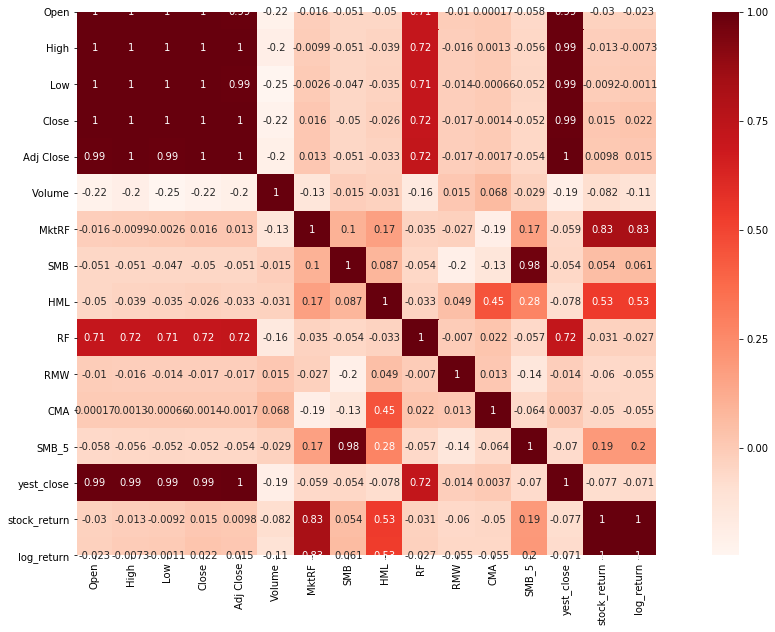

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(), annot=True, square=True, cmap='Reds')
plt.show()

In [13]:
corr = data.corr()

In [14]:
corr.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Adj Close,Volume
Open,1,0.998741,0.998696,0.997878,0.993402,-0.222683
High,0.998741,1,0.997537,0.998699,0.995496,-0.198992
Low,0.998696,0.997537,1,0.998671,0.992994,-0.249506
Close,0.997878,0.998699,0.998671,1,0.995414,-0.227346
Adj Close,0.993402,0.995496,0.992994,0.995414,1,-0.203968
Volume,-0.222683,-0.198992,-0.249506,-0.227346,-0.203968,1


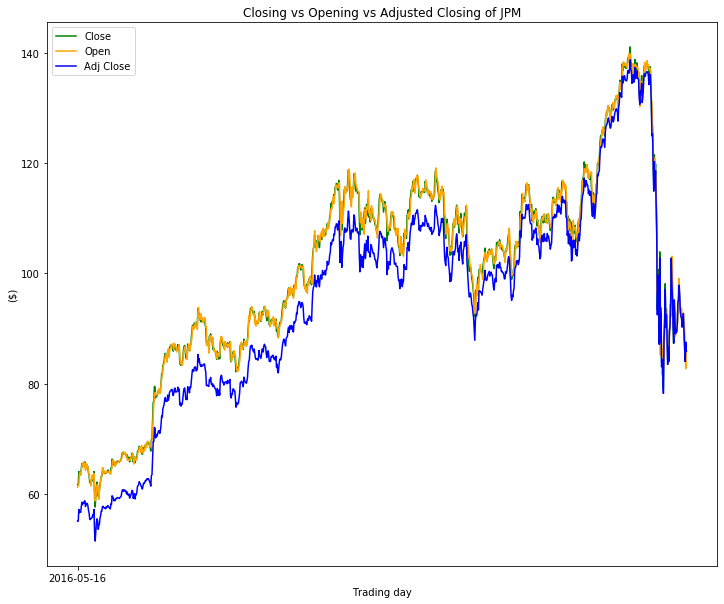

In [20]:
plt.figure(figsize=(12, 10))
plt.plot(data['Close'], 'green', label= 'Close')
plt.plot(data['Open'], 'orange', label='Open')
plt.plot(data['Adj Close'], 'blue', label='Adj Close' )
plt.title('Closing vs Opening vs Adjusted Closing of JPM')
plt.ylabel('($)')
plt.xlabel('Trading day')
plt.xticks(np.arange(0,10,200), data['Date'][0:10:200])
plt.legend()

Text(0.5, 1.0, 'JPM autocorrelation plot')

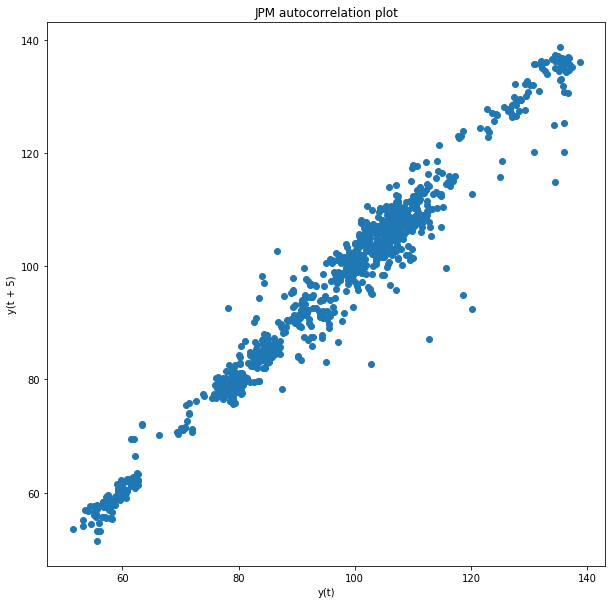

In [21]:
plt.figure(figsize=(10,10))
lag_plot(data['Adj Close'], lag=5)
plt.title('JPM autocorrelation plot')

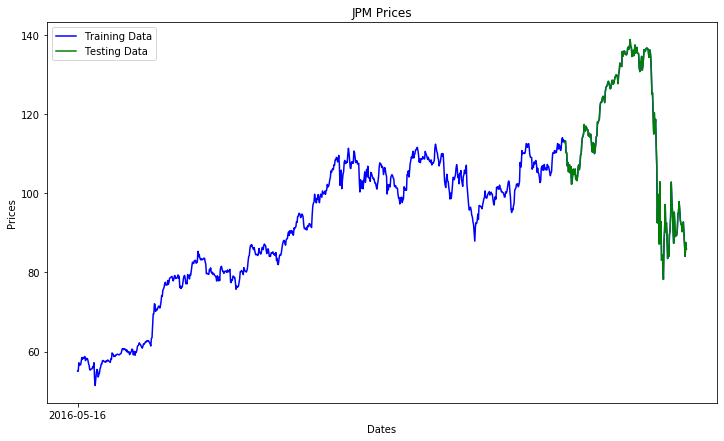

In [17]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(12,7))
plt.title('JPM Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
plt.xticks(np.arange(0,798, 1300), data['Date'][0:7982:1300])
plt.legend()

In [25]:
train_ar = train_data['Adj Close'].values
test_ar = test_data['Adj Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)

<class 'list'>
Testing Mean Squared Error: 10.302


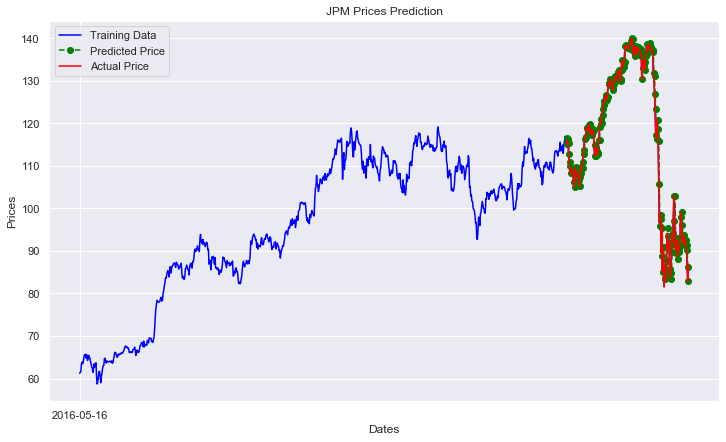

In [66]:
plt.figure(figsize=(12,7))
plt.plot(data['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('JPM Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,798, 1300), data['Date'][0:7982:1300])
plt.legend()

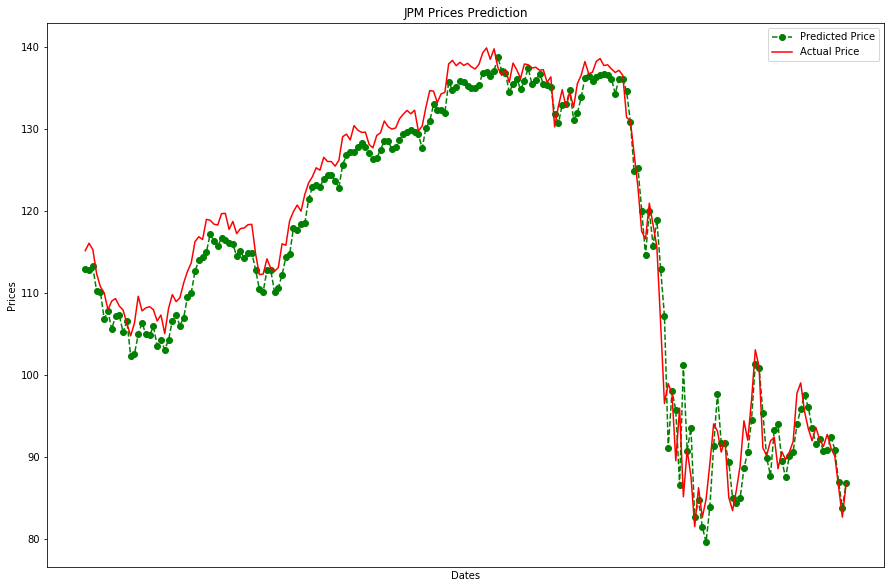

In [19]:
plt.figure(figsize=(15,10))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.legend()
plt.title('JPM Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(638,792, 300), data['Date'][6386:7982:300])
plt.legend()